In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# data = 'wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
# !wget $data

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
remove = ['default', 'loan']

df = df.drop(remove, axis = 1)

In [6]:
df.shape

(45211, 15)

In [7]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [11]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

### Question 1

In [12]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

### Question 2

In [13]:
df[numerical].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

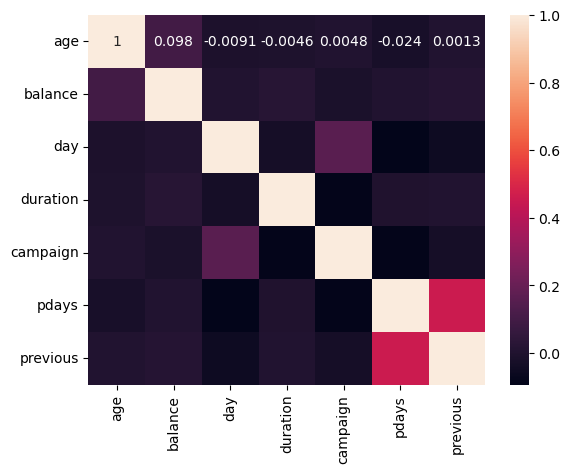

In [14]:
sns.heatmap(df[numerical].corr(), annot=True)

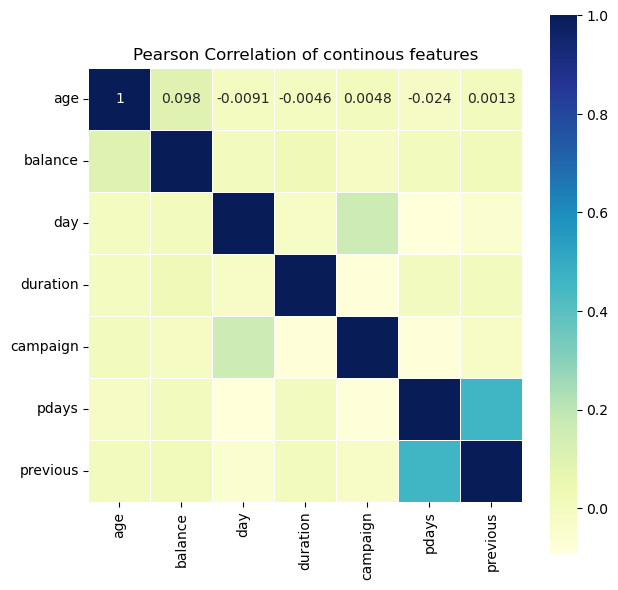

In [15]:
# plot the heatmap showing calculated correlations
plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(df.corr(), 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                )

#### Observation: Age and balance are the most correlating

### Target encoding

In [16]:
#convert to numbers

df.y = (df.y == 'yes').astype(int)

In [17]:
df.y.dtypes

dtype('int32')

### Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [20]:
print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}')

lenght of full train is 36168,
lenght of test is 9043


In [21]:
# further divide the full train to obtain 20 percent for the validation
# 25% of 80% is 20% of the original dataset length

df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

print(f'lenght of full train is {len(df_full_train)},\nlenght of test is {len(df_test)}\n'
      f'length of validation is {len(df_val)}')

lenght of full train is 36168,
lenght of test is 9043
length of validation is 9042


In [22]:
df_full_train.head(3)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3344,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown,0
17965,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown,0
18299,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown,0


In [23]:
# reset index because the elements are now shuffled

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [24]:
# target values

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [25]:
#Delet churn variable from the data frame

del df_train['y']
del df_val['y']
del df_test['y']

### Question 3 Mutual information

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
# we can use Apply

series = ['contact', 'education', 'housing', 'poutcome']


def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.y, series)

df_full_train[series].apply(mutual_info_churn_score)

contact      0.014164
education    0.002458
housing      0.009800
poutcome     0.029257
dtype: float64

In [28]:
mutual_info_score(df_full_train.y, df_full_train.contact )

0.014163614885003041

In [29]:
mutual_info_score(df_full_train.y, df_full_train.education )

0.0024578282035066477

In [30]:
mutual_info_score(df_full_train.y, df_full_train.housing )

0.00980003813867901

In [31]:
mutual_info_score(df_full_train.y, df_full_train.poutcome )

0.02925655626647966

#### observation: poutcome has the highest mutual information score

### Categorical encoding

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records') 
train_dict[0]

{'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'aug',
 'poutcome': 'unknown',
 'age': 32,
 'balance': 1100,
 'day': 11,
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0}

In [34]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_dict)

X_train.shape

(27126, 47)

In [35]:
#Vectorise validation set

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(9042, 47)

### Question 4

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [38]:
model.intercept_[0]

-0.9426328016047085

In [39]:
model.coef_[0]#.shape

array([-2.25820964e-03,  1.11954533e-05, -8.00985652e-02,  2.81360717e-01,
        7.34741202e-02, -1.29746764e+00,  7.17730063e-03,  4.12878817e-03,
       -4.33928280e-01, -2.40559786e-01, -6.05105698e-02, -2.07634165e-01,
       -1.04620058e-01, -8.38012743e-01,  6.76592001e-02, -2.29054808e-01,
       -2.60654194e-01, -2.98897153e-01, -8.48824721e-02,  3.32623459e-01,
       -2.99547494e-01, -1.53010375e-01,  2.58466092e-01, -1.50925907e-01,
        1.65897351e-02, -1.40998886e-01, -3.00802062e-01, -4.58580601e-01,
       -1.83250139e-01,  4.55876869e-02, -7.10415782e-01,  3.36216984e-01,
       -3.37528595e-01, -1.04238557e+00, -9.93900708e-01,  3.06610122e-01,
        1.35895132e+00, -4.96500696e-01, -9.73701688e-01,  7.99550935e-01,
        7.64883187e-01, -5.49803581e-04, -7.89491959e-01, -6.23256372e-01,
        1.49553451e+00, -1.02541898e+00,  6.19949217e-03])

In [40]:
y_pred = model.predict_proba(X_val)[:, 1]

In [41]:
y_pred

array([0.0125799 , 0.00939575, 0.14708588, ..., 0.04843197, 0.00881176,
       0.27923652])

In [42]:
y_decision = (y_pred >= 0.5)

In [106]:
y_pred_all = (y_decision == y_val).mean()
y_pred_all.round(2)

0.9

### Feature elimation

In [44]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

#### NO AGE

In [45]:
# Remove Age
#print(numerical)

del numerical[0]
numerical

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [46]:
train_no_age = df_train[categorical + numerical].to_dict(orient = 'records') 


In [47]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_age)

X_train.shape

(27126, 46)

In [48]:
#Vectorise validation set

val_no_age = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_no_age)

X_val.shape

(9042, 46)

In [49]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [50]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.01285547, 0.00949726, 0.15457749, ..., 0.05177581, 0.00878522,
       0.28130631])

In [51]:
y_pred_no_age = (y_pred >= 0.5)

In [52]:
acc_no_age = (y_pred_no_age == y_val).mean()
acc_no_age#.round(2)

0.9002433090024331

#### NO BALANCE

In [53]:
# Remove Bakance
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

del numerical[1]
numerical

['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [54]:
train_no_balance = df_train[categorical + numerical].to_dict(orient = 'records') 


In [55]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_balance)

X_train.shape

(27126, 46)

In [56]:
#Vectorise validation set

val_no_age = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(9042, 46)

In [57]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [58]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.01308785, 0.00973746, 0.15853965, ..., 0.05409393, 0.00897896,
       0.29277862])

In [59]:
y_pred_no_bal = (y_pred >= 0.5)

In [60]:
acc_no_bal = (y_pred_no_bal == y_val).mean()
acc_no_bal#.round(2)

0.9006856890068569

#### NO MARITAL

In [61]:
# Remove Marital
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

del categorical[1]
categorical

['job', 'education', 'housing', 'contact', 'month', 'poutcome']

In [62]:
train_no_marital = df_train[categorical + numerical].to_dict(orient = 'records') 


In [63]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_marital)

X_train.shape

(27126, 44)

In [64]:
#Vectorise validation set

val_no_marital = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_no_marital)

X_val.shape

(9042, 44)

In [65]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [66]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.01229876, 0.00807885, 0.16507829, ..., 0.05773507, 0.01012702,
       0.29929158])

In [67]:
y_pred_no_marital = (y_pred >= 0.5)

In [68]:
acc_no_marital = (y_pred_no_marital == y_val).mean()
acc_no_marital#.round(2)

0.9012386640123866

#### NO PREVIOUS

In [69]:
# Remove previous
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

del numerical[-1]
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

In [70]:
train_no_prev = df_train[categorical + numerical].to_dict(orient = 'records') 


In [71]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_no_prev)

X_train.shape

(27126, 46)

In [72]:
#Vectorise validation set

val_no_prev = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_no_prev)

X_val.shape

(9042, 46)

In [73]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [74]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.013335  , 0.00947461, 0.15674378, ..., 0.04477538, 0.00888863,
       0.27642006])

In [75]:
y_pred_no_prev = (y_pred >= 0.5)

In [76]:
acc_no_prev = (y_pred_no_marital == y_val).mean()
acc_no_prev#.round(2)

0.9012386640123866

### Scores comparisons

In [84]:
# AGE
age = y_pred_all - acc_no_age

In [85]:
# BAL
bal = y_pred_all - acc_no_bal

In [86]:
#MARITAL
marital = y_pred_all - acc_no_marital

In [87]:
#PREV
prev = y_pred_all - acc_no_prev

In [97]:
scores = [age, bal, marital, prev]

In [99]:
mydict = {
    'Age': age,
    'Bal': bal,
    'Marital': marital,
    'Prev': prev
}


myKeys = list(mydict.keys())
myKeys.sort()

# Sorted Dictionary
sd = {i: mydict[i] for i in myKeys}
print(sd)

{'Age': 0.0013271400132713884, 'Bal': 0.0008847600088476293, 'Marital': 0.00033178500331787486, 'Prev': 0.00033178500331787486}


#### Observation: Previous is the least

### Question 6

In [100]:

numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']


In [101]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records') 

In [102]:
# Vectorise train set

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(train_dict)

X_train.shape

(27126, 47)

In [103]:
#Vectorise validation set

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')

#dv = DictVectorizer(sparse = False)

X_val = dv.transform(val_dict)

X_val.shape

(9042, 47)

In [105]:
c = [0.01, 0.1, 1, 10, 100]

for r in c:
    logreg = LogisticRegression(solver='liblinear', C= r, max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict_proba(X_val)[:,1]
    
    y_pred = (y_pred >= 0.5)
    
    acc_no_prev = (y_pred_no_marital == y_val).mean()
    
    
    print(f'Regularization {r}: Accuracy = {acc_no_prev.round(3)}')

Regularization 0.01: Accuracy = 0.901
Regularization 0.1: Accuracy = 0.901
Regularization 1: Accuracy = 0.901
Regularization 10: Accuracy = 0.901
Regularization 100: Accuracy = 0.901
